<h2 style="text-align: center;"><strong>PF: Mejora de rendimiento: Análisis para transformar el juego</strong></h2>

<h3 style="text-align: left; color: #27CDF2;"><em>EDA y ETL Archivo Game</em></h3>

#### 📌 Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 📂 Carga de datos

In [2]:
# Ruta al archivo CSV-Se lo va a llamar game
df_game = pd.read_csv(r"game.csv")

In [3]:
# Mostrar primeras filas en formato tabla
df_game.head(10)

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season
5,21946,1610610026,CLR,Cleveland Rebels,24600006,1946-11-03 00:00:00,CLR vs. HUS,W,0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,-11,0,Regular Season
6,21946,1610610031,PIT,Pittsburgh Ironmen,24600007,1946-11-04 00:00:00,PIT vs. WAS,L,0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,71.0,15,0,Regular Season
7,21946,1610612738,BOS,Boston Celtics,24600008,1946-11-05 00:00:00,BOS vs. CHS,L,0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,57.0,2,0,Regular Season
8,21946,1610610028,DEF,Detroit Falcons,24600009,1946-11-05 00:00:00,DEF vs. BOM,L,0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,4,0,Regular Season
9,21946,1610610032,PRO,Providence Steamrollers,24600011,1946-11-07 00:00:00,PRO vs. CHS,W,0,31.0,...,NaN,NaN,NaN,NaN,NaN,14.0,65.0,-8,0,Regular Season


In [4]:
# Cantidad de filas y columnas
filas, columnas = df_game.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")

El dataset tiene 65698 filas y 55 columnas.


In [5]:
# Ver detalle de las columnas
print(df_game.columns)

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away',
       'season_type'],
      dtype='object')


In [6]:
# Ver el tipo de dato en las columnas
print(df_game.dtypes)

season_id                   int64
team_id_home                int64
team_abbreviation_home     object
team_name_home             object
game_id                     int64
game_date                  object
matchup_home               object
wl_home                    object
min                         int64
fgm_home                  float64
fga_home                  float64
fg_pct_home               float64
fg3m_home                 float64
fg3a_home                 float64
fg3_pct_home              float64
ftm_home                  float64
fta_home                  float64
ft_pct_home               float64
oreb_home                 float64
dreb_home                 float64
reb_home                  float64
ast_home                  float64
stl_home                  float64
blk_home                  float64
tov_home                  float64
pf_home                   float64
pts_home                  float64
plus_minus_home             int64
video_available_home        int64
team_id_away  

#### 🧹 Limpieza y transformación de datos

In [7]:
# Conversion columna game_date de string a datetime
df_game["game_date"] = pd.to_datetime(df_game["game_date"])

# Verificacion de que los datos son fechas
print(df_game["game_date"].dtypes)

datetime64[ns]


In [8]:
# filtrar fechas > 2018
filtro = df_game["game_date"] >= "2018-01-01"
df_game_mayor_2018 = df_game[filtro]

# Ver resultado
print(f"El dataset filtrado tiene {df_game_mayor_2018.shape[0]} registros y {df_game_mayor_2018.shape[1]} columnas.")


El dataset filtrado tiene 7213 registros y 55 columnas.


##### <u>Paso 1 - Se crea CSV con métricas para conocer los 10 equipos más ganadores</u>

In [9]:
# cantidad de partidos ganados, perdidos y el % de victorias por equipo, sumando los partidos de local y de visitante.
# armar datos para equipo local
home = df_game_mayor_2018[['team_name_home', 'wl_home']].copy()
home['win'] = (home['wl_home'] == 'W').astype(int)
home['loss'] = (home['wl_home'] == 'L').astype(int)
home.rename(columns={'team_name_home': 'team'}, inplace=True)

# armar datos para equipo visitante
away = df_game_mayor_2018[['team_name_away', 'wl_away']].copy()
away['win'] = (away['wl_away'] == 'W').astype(int)
away['loss'] = (away['wl_away'] == 'L').astype(int)
away.rename(columns={'team_name_away': 'team'}, inplace=True)

# unir locales y visitantes
all_games = pd.concat([home[['team', 'win', 'loss']], away[['team', 'win', 'loss']]])

# agrupar por equipo
top10_teams = all_games.groupby('team').sum().reset_index()
top10_teams['total_games'] = top10_teams['win'] + top10_teams['loss']

# mostrar resultado
print(top10_teams)

                         team  win  loss  total_games
0              Adelaide 36ers    1     1            2
1               Atlanta Hawks  207   265          472
2              Boston Celtics  322   214          536
3               Brooklyn Nets  244   231          475
4           Charlotte Hornets  190   252          442
5               Chicago Bulls  186   260          446
6         Cleveland Cavaliers  199   270          469
7            Dallas Mavericks  241   237          478
8              Denver Nuggets  318   200          518
9             Detroit Pistons  144   303          447
10      Golden State Warriors  299   220          519
11            Houston Rockets  224   265          489
12             Indiana Pacers  223   239          462
13                LA Clippers  279   212          491
14         Los Angeles Lakers  262   233          495
15          Memphis Grizzlies  240   234          474
16                 Miami Heat  294   227          521
17            Milwaukee Buck

In [10]:
# se realizó la diferencia entre ganados y perdidos por equipo en los últimos cinco años y se pidió que muestre los mejores 10
# se suma el total de partidos jugados
top10_teams['win_loss_diff'] = top10_teams['win'] - top10_teams['loss']
top10_teams['total_games'] = top10_teams['win'] + top10_teams['loss']

top10_teams = top10_teams.sort_values(by='win_loss_diff', ascending=False).head(10)

print(top10_teams[['team', 'win', 'loss', 'win_loss_diff', 'total_games']])


                     team  win  loss  win_loss_diff  total_games
17        Milwaukee Bucks  339   185            154          524
23     Philadelphia 76ers  323   185            138          508
8          Denver Nuggets  318   200            118          518
2          Boston Celtics  322   214            108          536
33        Toronto Raptors  299   203             96          502
34              Utah Jazz  287   199             88          486
10  Golden State Warriors  299   220             79          519
16             Miami Heat  294   227             67          521
13            LA Clippers  279   212             67          491
14     Los Angeles Lakers  262   233             29          495


In [11]:
top10_teams.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 17 to 14
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team           10 non-null     object
 1   win            10 non-null     int64 
 2   loss           10 non-null     int64 
 3   total_games    10 non-null     int64 
 4   win_loss_diff  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 480.0+ bytes


In [12]:
# Ver cantidad de registros y columnas
filas, columnas = top10_teams.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")


El dataset tiene 10 filas y 5 columnas.


In [13]:
# antes de guardar el CSV nuevo se van a calcular métricas adicionales
top10_teams['win_pct'] = top10_teams['win'] / top10_teams['total_games']
top10_teams['loss_pct'] = top10_teams['loss'] / top10_teams['total_games']
top10_teams['avg_win_per_year'] = top10_teams['win']/5

# Redondear para presentación
top10_teams[['win_pct', 'loss_pct']] = top10_teams[['win_pct', 'loss_pct']].round(3)
top10_teams['avg_win_per_year'] = top10_teams['avg_win_per_year'].round(1)

# Mostrar resultados
print(top10_teams)

                     team  win  loss  total_games  win_loss_diff  win_pct  \
17        Milwaukee Bucks  339   185          524            154    0.647   
23     Philadelphia 76ers  323   185          508            138    0.636   
8          Denver Nuggets  318   200          518            118    0.614   
2          Boston Celtics  322   214          536            108    0.601   
33        Toronto Raptors  299   203          502             96    0.596   
34              Utah Jazz  287   199          486             88    0.591   
10  Golden State Warriors  299   220          519             79    0.576   
16             Miami Heat  294   227          521             67    0.564   
13            LA Clippers  279   212          491             67    0.568   
14     Los Angeles Lakers  262   233          495             29    0.529   

    loss_pct  avg_win_per_year  
17     0.353              67.8  
23     0.364              64.6  
8      0.386              63.6  
2      0.399        

In [14]:
# Ver cantidad de registros y columnas
filas, columnas = top10_teams.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")


El dataset tiene 10 filas y 8 columnas.


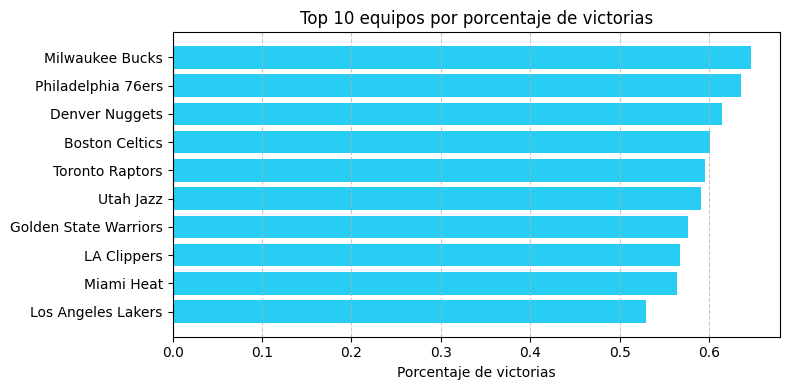

In [15]:
# Ordenar de menor a mayor para que el gráfico se vea en orden ascendente
top10_teams_sorted = top10_teams.sort_values(by='win_pct', ascending=True)

# Crear gráfico de barras horizontales con color personalizado
plt.figure(figsize=(8, 4))
plt.barh(top10_teams_sorted['team'], top10_teams_sorted['win_pct'], color="#27CDF2")

# Etiquetas y título
plt.xlabel('Porcentaje de victorias')
plt.title('Top 10 equipos por porcentaje de victorias')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar presentación
plt.tight_layout()
plt.show()


In [16]:
# Guardar CSV
top10_teams.to_csv("game_top10_metricas.csv", index=False)

##### <u>Paso 2 - Se crea CSV con datos originales limpios y transformados para posteriores análisis</u>

In [17]:
# Lista de los 10 equipos
game_top10_list = ['Milwaukee Bucks', 'Philadelphia 76ers', 'Denver Nuggets', 'Boston Celtics', 'Toronto Raptors', 'Utah Jazz',
    'Golden State Warriors', 'LA Clippers', 'Miami Heat', 'Los Angeles Lakers']

# Filtrar partidos donde alguno de esos equipos juegue como local o visitante
game_top10 = df_game_mayor_2018[
    (df_game_mayor_2018['team_name_home'].isin(game_top10_list)) |
    (df_game_mayor_2018['team_name_away'].isin(game_top10_list))
].copy()

game_top10.head(10)

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
58407,22017,1610612750,MIN,Minnesota Timberwolves,21700548,2018-01-01,MIN vs. LAL,W,240,40.0,...,37.0,18.0,12.0,4.0,24.0,25.0,96.0,-18,1,Regular Season
58409,22017,1610612761,TOR,Toronto Raptors,21700546,2018-01-01,TOR vs. MIL,W,265,45.0,...,43.0,27.0,9.0,3.0,15.0,23.0,127.0,-4,1,Regular Season
58413,22017,1610612746,LAC,LA Clippers,21700553,2018-01-02,LAC vs. MEM,W,240,39.0,...,38.0,18.0,10.0,2.0,14.0,29.0,105.0,-8,1,Regular Season
58416,22017,1610612738,BOS,Boston Celtics,21700559,2018-01-03,BOS vs. CLE,W,240,41.0,...,48.0,16.0,6.0,7.0,15.0,17.0,88.0,-14,1,Regular Season
58418,22017,1610612742,DAL,Dallas Mavericks,21700562,2018-01-03,DAL vs. GSW,L,240,43.0,...,46.0,36.0,8.0,7.0,14.0,21.0,125.0,3,1,Regular Season
58419,22017,1610612741,CHI,Chicago Bulls,21700560,2018-01-03,CHI vs. TOR,L,240,43.0,...,49.0,23.0,9.0,5.0,11.0,20.0,124.0,9,1,Regular Season
58420,22017,1610612762,UTA,Utah Jazz,21700564,2018-01-03,UTA vs. NOP,L,240,38.0,...,42.0,23.0,8.0,2.0,20.0,18.0,108.0,10,1,Regular Season
58422,22017,1610612743,DEN,Denver Nuggets,21700563,2018-01-03,DEN vs. PHX,W,240,51.0,...,35.0,26.0,12.0,1.0,12.0,18.0,111.0,-23,1,Regular Season
58423,22017,1610612755,PHI,Philadelphia 76ers,21700555,2018-01-03,PHI vs. SAS,W,240,36.0,...,43.0,15.0,4.0,4.0,16.0,25.0,106.0,-6,1,Regular Season
58425,22017,1610612747,LAL,Los Angeles Lakers,21700565,2018-01-03,LAL vs. OKC,L,240,38.0,...,44.0,36.0,12.0,5.0,9.0,17.0,133.0,37,1,Regular Season


In [18]:
# Ver cantidad de registros y columnas
filas, columnas = game_top10.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")


El dataset tiene 4238 filas y 55 columnas.


In [19]:
game_top10.duplicated().sum()


np.int64(0)

In [20]:
# analizo nulos y tipo de dato
game_top10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 58407 to 65695
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   season_id               4238 non-null   int64         
 1   team_id_home            4238 non-null   int64         
 2   team_abbreviation_home  4238 non-null   object        
 3   team_name_home          4238 non-null   object        
 4   game_id                 4238 non-null   int64         
 5   game_date               4238 non-null   datetime64[ns]
 6   matchup_home            4238 non-null   object        
 7   wl_home                 4238 non-null   object        
 8   min                     4238 non-null   int64         
 9   fgm_home                4238 non-null   float64       
 10  fga_home                4238 non-null   float64       
 11  fg_pct_home             4238 non-null   float64       
 12  fg3m_home               4238 non-null   float64 

In [21]:
# Confirmar que no hay nulos
game_top10.isnull().sum().sum()


np.int64(0)

In [22]:
# Análisis estadístico por columna
for columna in game_top10.columns:
    print(columna)
    print(game_top10[columna].describe())
    print('----------------------------------------------------')

season_id
count     4238.000000
mean     23883.811468
std       6405.898723
min      12020.000000
25%      22018.000000
50%      22020.000000
75%      22022.000000
max      42022.000000
Name: season_id, dtype: float64
----------------------------------------------------
team_id_home
count    4.238000e+03
mean     1.610613e+09
std      8.177061e+00
min      1.610613e+09
25%      1.610613e+09
50%      1.610613e+09
75%      1.610613e+09
max      1.610613e+09
Name: team_id_home, dtype: float64
----------------------------------------------------
team_abbreviation_home
count     4238
unique      30
top        BOS
freq       268
Name: team_abbreviation_home, dtype: object
----------------------------------------------------
team_name_home
count               4238
unique                30
top       Boston Celtics
freq                 268
Name: team_name_home, dtype: object
----------------------------------------------------
game_id
count    4.238000e+03
mean     2.383711e+07
std      6.39672

In [23]:
# matriz de correlación: variables relacionadas con los tiros (triples, libres, de campo) más asociadas con ganar el partido - local
# Variable binaria: victoria del equipo local
game_top10['win_home'] = (game_top10['wl_home'] == 'W').astype(int)

# Variables de tiro + victoria con nombres amigables
variables_home = {
    'fgm_home': 'Tiros de campo encestados',
    'fga_home': 'Tiros de campo intentados',
    'fg_pct_home': '% Tiros de campo',
    'fg3m_home': 'Triples encestados',
    'fg3a_home': 'Triples intentados',
    'fg3_pct_home': '% Triples',
    'ftm_home': 'Tiros libres encestados',
    'fta_home': 'Tiros libres intentados',
    'ft_pct_home': '% Tiros libres',
    'pts_home': 'Puntos totales',
    'win_home': 'Victoria local (1/0)'
}

# Renombrar columnas temporalmente
df_home = game_top10[list(variables_home.keys())].rename(columns=variables_home)

# Calcular y mostrar correlación con victoria
correlacion_home = df_home.corr()[['Victoria local (1/0)']].sort_values(by='Victoria local (1/0)', ascending=False)
print(correlacion_home)

                           Victoria local (1/0)
Victoria local (1/0)                   1.000000
Puntos totales                         0.490415
% Tiros de campo                       0.453041
Tiros de campo encestados              0.416068
% Triples                              0.350581
Triples encestados                     0.268602
% Tiros libres                         0.115319
Tiros libres encestados                0.112993
Tiros libres intentados                0.072816
Triples intentados                     0.011703
Tiros de campo intentados             -0.004014


La eficiencia en los tiros de campo (fg_pct_home - no tanto la cantidad) es un buen predictor de victoria. Cuando hablamos de eficiencia de tiro, nos referimos a cuántos tiros convierte un equipo en relación a los que intenta. Se mide con porcentajes

In [24]:
# Variable binaria: victoria del equipo visitante
game_top10['win_away'] = (game_top10['wl_away'] == 'W').astype(int)

# Variables de tiro + victoria con nombres amigables
variables_away = {
    'fgm_away': 'Tiros de campo encestados',
    'fga_away': 'Tiros de campo intentados',
    'fg_pct_away': '% Tiros de campo',
    'fg3m_away': 'Triples encestados',
    'fg3a_away': 'Triples intentados',
    'fg3_pct_away': '% Triples',
    'ftm_away': 'Tiros libres encestados',
    'fta_away': 'Tiros libres intentados',
    'ft_pct_away': '% Tiros libres',
    'pts_away': 'Puntos totales',
    'win_away': 'Victoria visitante (1/0)'
}

# Renombrar columnas temporalmente
df_away = game_top10[list(variables_away.keys())].rename(columns=variables_away)

# Calcular y mostrar correlación con victoria
correlacion_away = df_away.corr()[['Victoria visitante (1/0)']].sort_values(by='Victoria visitante (1/0)', ascending=False)
print(correlacion_away)


                           Victoria visitante (1/0)
Victoria visitante (1/0)                   1.000000
Puntos totales                             0.455215
% Tiros de campo                           0.435725
Tiros de campo encestados                  0.387675
% Triples                                  0.357977
Triples encestados                         0.280220
% Tiros libres                             0.122799
Tiros libres encestados                    0.095650
Tiros libres intentados                    0.056452
Triples intentados                         0.029932
Tiros de campo intentados                 -0.026953


Esto confirma que la eficiencia en el tiro (fg_pct_away - más que la cantidad) es una de las claves para ganar, tanto de local como de visitante. Cuando hablamos de eficiencia de tiro, nos referimos a cuántos tiros convierte un equipo en relación a los que intenta.
Se mide con porcentajes
- Un equipo eficiente (alto %), es el que aprovecha mejor sus oportunidades.
- Un equipo puede tirar mucho y fallar mucho (baja eficiencia), o tirar poco pero convertir mucho (alta eficiencia).
- La eficiencia es un indicador de calidad, no de volumen.

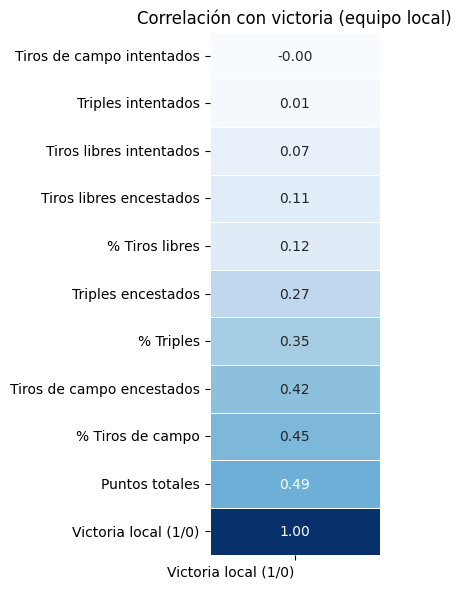

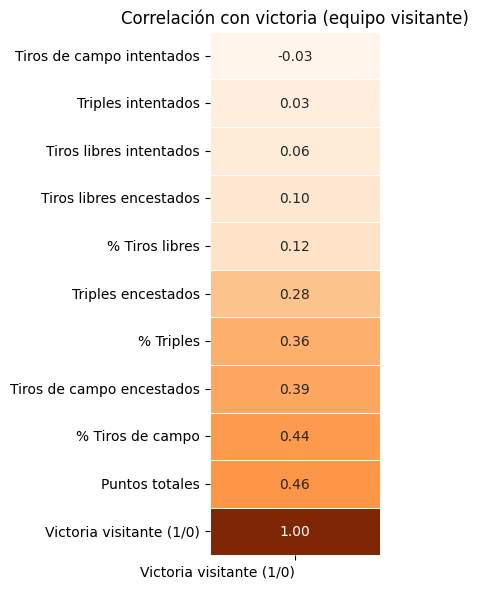

In [25]:
# Crear variable binaria
game_top10['win_home'] = (game_top10['wl_home'] == 'W').astype(int)

# Diccionario de nombres amigables
variables_home = {
    'fgm_home': 'Tiros de campo encestados',
    'fga_home': 'Tiros de campo intentados',
    'fg_pct_home': '% Tiros de campo',
    'fg3m_home': 'Triples encestados',
    'fg3a_home': 'Triples intentados',
    'fg3_pct_home': '% Triples',
    'ftm_home': 'Tiros libres encestados',
    'fta_home': 'Tiros libres intentados',
    'ft_pct_home': '% Tiros libres',
    'pts_home': 'Puntos totales',
    'win_home': 'Victoria local (1/0)'
}

# Renombrar y calcular correlación
df_home = game_top10[list(variables_home.keys())].rename(columns=variables_home)
correlacion_home = df_home.corr()[['Victoria local (1/0)']].sort_values(by='Victoria local (1/0)', ascending=True)

# Heatmap
plt.figure(figsize=(4, 6))
sns.heatmap(correlacion_home, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Correlación con victoria (equipo local)')
plt.xticks(ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Crear variable binaria
game_top10['win_away'] = (game_top10['wl_away'] == 'W').astype(int)

# Diccionario de nombres amigables
variables_away = {
    'fgm_away': 'Tiros de campo encestados',
    'fga_away': 'Tiros de campo intentados',
    'fg_pct_away': '% Tiros de campo',
    'fg3m_away': 'Triples encestados',
    'fg3a_away': 'Triples intentados',
    'fg3_pct_away': '% Triples',
    'ftm_away': 'Tiros libres encestados',
    'fta_away': 'Tiros libres intentados',
    'ft_pct_away': '% Tiros libres',
    'pts_away': 'Puntos totales',
    'win_away': 'Victoria visitante (1/0)'
}

# Renombrar y calcular correlación
df_away = game_top10[list(variables_away.keys())].rename(columns=variables_away)
correlacion_away = df_away.corr()[['Victoria visitante (1/0)']].sort_values(by='Victoria visitante (1/0)', ascending=True)

# Heatmap
plt.figure(figsize=(4, 6))
sns.heatmap(correlacion_away, annot=True, cmap='Oranges', fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Correlación con victoria (equipo visitante)')
plt.xticks(ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<Axes: >

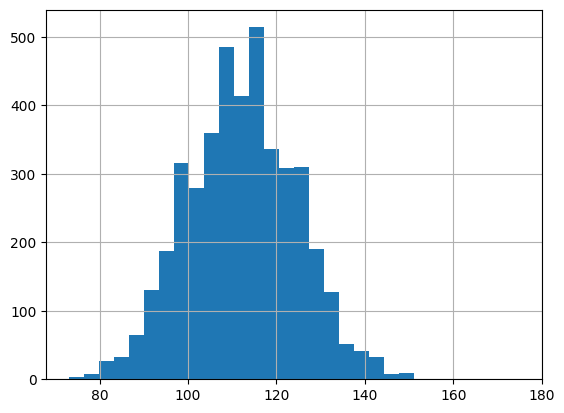

In [26]:
game_top10['pts_home'].hist(bins=30)

Es la distribución de puntos anotados por los equipos locales (pts_home) en los partidos de los 10 equipos seleccionados.
Forma de campana: la mayoría de los partidos tienen puntajes entre 100 y 125, lo que indica una distribución bastante normal (simétrica). No parece haber valores atípicos extremos ni una gran asimetría.

<Axes: >

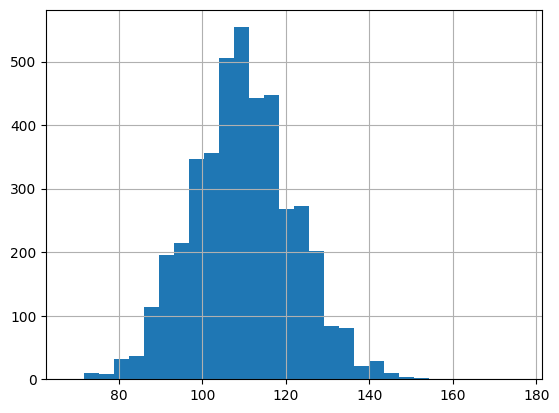

In [27]:
game_top10['pts_away'].hist(bins=30)

Es la distribución de puntos anotados por los equipos visitante (pts_away) en los partidos de los 10 equipos seleccionados.
Forma de campana: la mayoría de los partidos tienen puntajes entre 100 y 125, lo que indica una distribución bastante normal (simétrica). No parece haber valores atípicos extremos ni una gran asimetría.

In [28]:
# Filtrar solo los partidos donde los equipos top10 fueron locales
filtro_local = game_top10[game_top10['team_name_home'].isin(game_top10_list)]

# Agrupar y calcular promedio de puntos como locales
promedios_pts_home = (
    filtro_local.groupby('team_name_home')['pts_home']
    .mean()
    .sort_values()
)

# Mostrar resultado
print(promedios_pts_home)



team_name_home
Miami Heat               109.853846
Los Angeles Lakers       112.068273
Toronto Raptors          112.458824
Boston Celtics           113.033582
LA Clippers              113.796000
Philadelphia 76ers       113.972549
Utah Jazz                114.041494
Denver Nuggets           114.482759
Golden State Warriors    114.858779
Milwaukee Bucks          116.766284
Name: pts_home, dtype: float64


<Axes: xlabel='ast_home', ylabel='fg_pct_home'>

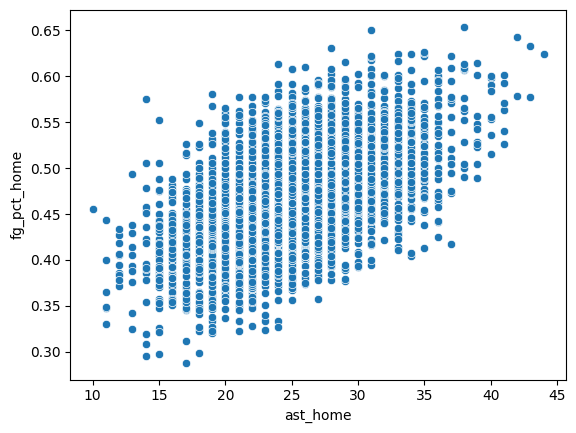

In [29]:
#  ¿a más asistencias (ast) hay mejor porcentaje de tiro?
sns.scatterplot(x='ast_home', y='fg_pct_home', data=game_top10)

Tendencia general: A medida que aumentan las asistencias (ast_home), también tiende a aumentar el porcentaje de tiro de campo (fg_pct_home).
No es lineal perfecta: Hay dispersión, pero la nube de puntos se inclina hacia arriba. Es decir, más juego colectivo (asistencias) suele asociarse con mayor efectividad de tiro.
Distribución pareja: Aunque hay ruido (varios puntos en la misma vertical), el patrón general indica una correlación leve a moderada positiva.

In [30]:
# Ver cantidad de registros y columnas
filas, columnas = game_top10.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")


El dataset tiene 4238 filas y 57 columnas.


In [31]:
# Guardar CSV
game_top10.to_csv("game_top10_original_limpio.csv", index=False)

In [32]:
es_unico = game_top10['game_id'].is_unique
print(f"¿'game_id' tiene valores únicos? {es_unico}")

¿'game_id' tiene valores únicos? True
